#TIPO DE GRAFICO COPADO PARA HACER:
- swarpplot
- pairplot : https://www.youtube.com/watch?v=cpZExlOKFH4    (using correlation analysis)
- alguna serie de tiempo
- scatter plot
- Boxplot : 

#PREGUNTAS QUE NOS HACEMOS:

---
## Que Hacer
1. Limpiar datasets
2. Estudiar demografia : educacion, sexo, barrio
1. 





## Categorias a tener en cuenta

2. **ANALISIS DESCRIPTIVO**:
  1. Distribucion geografica de postulantes (zona vs idpostulante)
  2. Segmentar categoriaavisos vs sexo.
  3. distribucion categorias vs idaplicantes
  4.
3. estudiar etapas de postulacion: la postulacion es un paso posterior a la visita realizada. Entoces: 
  1. instancias de visitas: cuantas visitas se realizan sobre el mismo idaviso.
    1. cuantas visitas hago sobre el mismo idaviso para luego postularme.
  2. tasa de conversion  postulaciones: cuantas visitas se transforman en la postulacion.
  
4. **RATIOS DE RENDIMIENTO** : 
  1. cual es el % de aciertos en las aplicaciones? (de la cantidad de aplicaciones hechas, en cuantas avanzo?)
  2. %
  
  
  
  
  
[]

## Preguntas sencillas


1.   histograma de edades (fecha aplicacion - fecha nacimiento = edad)
2.   Elemento de la lista
3.   Que empresa tiene mas [avisos, visitas, postulaciones]
  
![Modelo de finanza] (http://aseduco.com/blog1/wp-content/uploads/2017/02/RESUMEN-RATIOS-FINANCIEROS.jpg)
![Modelo de finanzas II] (http://www.enciclopediafinanciera.com/images/indicadores-financieros-tipos.jpg)

## Tareas a completar


---


[] Normalizar las tablas

[] Limpiar los datos

[] Armar modelo estrella

[] Segmentar datos por:
1. Postulante
  * [] sexo
  * [] edad
  * [] nivel_educativo
2. Aviso:
  * [] fecha_postulacion
  * [] lugar_de_trabajo
  * [] nombre_area_laboral
  
3. Construir matriz con tasas de 


In [16]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1K4uRag5nmGtfuvzyJV9RL_73lzsh_iTO'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

downloaded.GetContentFile('datos_navent_fiuba.tar')
!tar -xvf datos_navent_fiuba.tar
!ls datos_navent_fiuba/

# !cat datos_navent_fiuba/TERMINOS.txt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



datos_navent_fiuba/
datos_navent_fiuba/fiuba_6_avisos_detalle.csv
datos_navent_fiuba/TERMINOS.txt
datos_navent_fiuba/fiuba_5_avisos_online.csv
datos_navent_fiuba/fiuba_1_postulantes_educacion.csv
datos_navent_fiuba/fiuba_3_vistas.csv
datos_navent_fiuba/fiuba_4_postulaciones.csv
datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv
fiuba_1_postulantes_educacion.csv      fiuba_4_postulaciones.csv   TERMINOS.txt
fiuba_2_postulantes_genero_y_edad.csv  fiuba_5_avisos_online.csv
fiuba_3_vistas.csv		       fiuba_6_avisos_detalle.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook',color_codes=True)
pd.options.display.max_rows = 10

# Tabla de contenido

[Unidad 1: Limpieza de datos](#scrollTo=vshkbKh5El4A)

[Unidad 2: Análisis exploratorio](#scrollTo=Pv0TcFXSCv_g)

[Seaborn CheatSheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

# Unidad 1 : Limpieza de datos

##1.1 Importar Datos
Se cargan los datos y se redefinen los nombres de cada dataframe. Con esto logrmos entender mejor por su nombre.


In [0]:
postulantes_educacion = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero_edad = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
visitas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')


### 1.1.1 Renombramos Columnas
Nos permite trabajar mas comodamente, dado que referenciamos los atributos de manera intuitiva. Solo cambiamos las tablas que creemos que deben modificarse el nombre de alguna columna. En este caso: postulantes_educacion, visitas, avisos_detalle.

In [0]:
postulantes_educacion = postulantes_educacion.rename(index=str,columns={"idpostulante": "id_postulante", "nombre":"nivel_educacion"});
postulantes_genero_edad = postulantes_genero_edad.rename(index=str, columns={"idpostulante": "id_postulante", "fechanacimiento":"fecha_nacimiento"})
visitas = visitas.rename(index=str,columns={"idAviso":"id_aviso", "idpostulante": "id_postulante", "timestamp":"fecha_visita"});
avisos_detalle = avisos_detalle.rename(index=str, columns={"idaviso":"id_aviso", "titulo":"titulo_aviso", "descripcion":"descripcion_aviso","nombre_zona":"zona_de_trabajo","mapacalle":"direccion","nombre_area":"nombre_area_laboral","denominacion_empresa":"nombre_empresa"});
avisos_online = avisos_online.rename(index=str, columns={"idaviso":"id_aviso"})
postulaciones = postulaciones.rename(index = str, columns={"idaviso":"id_aviso", "idpostulante":"id_postulante", "fechapostulacion":"fecha_postulacion"})


##1.2 Conocer Información de datos
Buscamos conocer el tipo de dato y su descripcion. Para ello creamos una funcion *describir_dataframe* para luego replicarlo para cada dataframe.


### 1.2.1Creamos funcion *describir_frame*

In [0]:
def describir_dataframe(df):
    '''Muestra caracteristicas '''
    print('-Información general:\n')
    df.info()
    print('\n- Descripción de las columnas:\n')
    print(df.describe(include='all'),'\n')
    print('- Muestra del DataFrame:\n')
    print(df.head(5))
    return

A partir de la descripción del dataframe vemos que cambios podemos realizar al mismo,
ya sea cambio de nombres, cambio de tipo de dato y control de valores nulos.

#### 1.2.1.1 Aplicamos funcion a : postulantes_educacion

In [21]:
describir_dataframe(postulantes_educacion)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 298231 entries, 0 to 298230
Data columns (total 3 columns):
id_postulante      298231 non-null object
nivel_educacion    298231 non-null object
estado             298231 non-null object
dtypes: object(3)
memory usage: 9.1+ MB

- Descripción de las columnas:

       id_postulante nivel_educacion    estado
count         298231          298231    298231
unique        188752               7         3
top           YlMLGD      Secundario  Graduado
freq               9          110256    194474 

- Muestra del DataFrame:

  id_postulante nivel_educacion    estado
0          NdJl        Posgrado  En Curso
1          8BkL   Universitario  En Curso
2          1d2B   Universitario  En Curso
3          NPBx   Universitario  En Curso
4          NPBx          Master  En Curso


*Para validar si aumentan los datos*
> 10/04 
Index: 298231 entries, 0 to 298230
Data columns (total 3 columns):
id_postulante      298231 non-null object
nivel_educacion    298231 non-null object
estado             298231 non-null object
dtypes: object(3)
memory usage: 9.1+ MB


Vemos que el dataframe tiene 3 columnas. Tanto *nombre* como *estado* son columnas categóricas
dado que toman pocos valores únicos, por lo cual podemos cambiarle el tipo de dato (de *object* a *category*).

Tambien se ve que hay **idpostulante** repetidos por lo que es necesario ver por qué motivo ocurre esto.

In [22]:
postulantes_educacion = postulantes_educacion.astype(dtype={'nivel_educacion':'category','estado':'category'})
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298231 entries, 0 to 298230
Data columns (total 3 columns):
id_postulante      298231 non-null object
nivel_educacion    298231 non-null category
estado             298231 non-null category
dtypes: category(2), object(1)
memory usage: 5.1+ MB


Validamos que se haya realizado el cambio y vemos como la memoria se redujo a menos de la mitad.

#### 1.2.1.2 Aplicamos funcion a : **postulantes**_genero_edad





In [23]:
describir_dataframe(postulantes_genero_edad)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 200888 entries, 0 to 200887
Data columns (total 3 columns):
id_postulante       200888 non-null object
fecha_nacimiento    196138 non-null object
sexo                200888 non-null object
dtypes: object(3)
memory usage: 6.1+ MB

- Descripción de las columnas:

       id_postulante fecha_nacimiento    sexo
count         200888           196138  200888
unique        200888            15027       3
top          ow2q4rr       1994-05-24     FEM
freq               1               57  101981 

- Muestra del DataFrame:

  id_postulante fecha_nacimiento  sexo
0          NM5M       1970-12-03   FEM
1          5awk       1962-12-04   FEM
2          ZaO5       1978-08-10   FEM
3          NdJl       1969-05-09  MASC
4          eo2p       1981-02-16  MASC


Hay tantos **idpostulante** como valores únicos, lo que indica que no hay *repetidos*.

In [24]:
postulantes_genero_edad = postulantes_genero_edad.astype(dtype={'sexo':'category'})
postulantes_genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200888 entries, 0 to 200887
Data columns (total 3 columns):
id_postulante       200888 non-null object
fecha_nacimiento    196138 non-null object
sexo                200888 non-null category
dtypes: category(1), object(2)
memory usage: 4.8+ MB


En el paso anterior no convertimos la columna *fechanacimiento* porque hay que hacer un análisis más detallado porque las filas no tienen el mismo formato. 

In [25]:
print('Fechas ordenadas en orden ascendente, mostrando los nulos primero:\n')
print(postulantes_genero_edad['fecha_nacimiento'].value_counts(dropna=False).sort_index(na_position='first').head(10))
print('Fechas ordenadas en orden descendente:\n')
print(postulantes_genero_edad['fecha_nacimiento'].value_counts().sort_index(ascending=False).head(10))

Fechas ordenadas en orden ascendente, mostrando los nulos primero:

NaN           4750
0004-07-19       1
0011-03-08       1
0012-11-04       1
0024-02-09       1
0029-05-11       1
0031-12-11       1
0033-09-14       1
1775-07-09       1
1917-07-08       1
Name: fecha_nacimiento, dtype: int64
Fechas ordenadas en orden descendente:

2006-01-01    1
2000-12-31    1
2000-12-28    1
2000-12-27    1
2000-12-12    1
2000-12-07    1
2000-11-28    1
2000-11-27    1
2000-11-26    1
2000-11-07    1
Name: fecha_nacimiento, dtype: int64


In [26]:
print('Hay un {:.2f}% de valores nulos'.format(postulantes_genero_edad['fecha_nacimiento'].isna().mean() * 100))

Hay un 2.36% de valores nulos


**CONCLUSION** Al tener 2.36 % de los datos con NaN, notamos que no hay gran proporción que pueda afectar en los resultados futuros de análisis.

**DECISION** : Se decide mantener en el df los NaN values para no alterar la fuente y mostrar el coportamiento de las mismas en relación a los datos correctamente tomados.

Para saber si podemos tirar los datos que no tienen el formato correcto vemos el resto de las columnas

In [27]:
print(postulantes_genero_edad.sort_values(by=['fecha_nacimiento']).head(10),'\n')
print(postulantes_genero_edad.sort_values(by=['fecha_nacimiento'],ascending=False).head(1))


       id_postulante fecha_nacimiento        sexo
148638       GNZOvAv       0004-07-19        MASC
149653       1QPQ8QL       0011-03-08        MASC
145683       dYjV0rb       0012-11-04  NO_DECLARA
130846       8M2R6pz       0024-02-09         FEM
71458        LN85Y3b       0029-05-11        MASC
56206        xkPwXwY       0031-12-11         FEM
141832       A36Npjj       0033-09-14         FEM
154559       xkdvwm0       1775-07-09        MASC
164618       96X1loa       1917-07-08        MASC
156483       4rP8l0R       1921-08-18         FEM 

     id_postulante fecha_nacimiento  sexo
6869        a5qWAm       2006-01-01  MASC


la primer fecha de nacimiento es [Council of War](https://founders.archives.gov/documents/Washington/03-01-02-0045)
[Lanus](https://encrypted.google.com/maps/place/C1092,+Av.+9+de+Julio+1775,+B1824KKQ+Lanús+Este,+Buenos+Aires/@-34.7125301,-58.3863253,17z/data=!3m1!4b1!4m5!3m4!1s0x95bccd3a19b52e5f:0x478bb3a3c0651908!8m2!3d-34.7125345!4d-58.3841366?hl=en)
[Ministerio de Salud](https://encrypted.google.com/maps/place/C1092,+Av.+9+de+Julio+1775,+C1092+CABA/@-34.612109,-58.3834105,17z/data=!3m1!4b1!4m5!3m4!1s0x95bccad0cc5fe421:0x5b5478bd8c558716!8m2!3d-34.6121134!4d-58.3812218?hl=en)
Anotamos el id_postulante para futuras exploraciones **xkdvwm0**

Similar para el más joven **a5qWAm**

Tranformamos las fechas con la función `to_datetime` con la opción `errors='coerce'` para que reemplaze las fechas no válidas con `NaT`

In [28]:
postulantes_genero_edad['fecha_nacimiento'] = pd.to_datetime(postulantes_genero_edad['fecha_nacimiento'],format='%Y-%m-%d',
              errors='coerce')

print(postulantes_genero_edad['fecha_nacimiento'].value_counts(dropna=False).sort_index(),'\n')

postulantes_genero_edad.info()

1775-07-09       1
1917-07-08       1
1921-08-18       1
1939-07-27       1
1941-09-21       1
              ... 
2000-12-27       1
2000-12-28       1
2000-12-31       1
2006-01-01       1
NaT           4757
Name: fecha_nacimiento, Length: 15021, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 200888 entries, 0 to 200887
Data columns (total 3 columns):
id_postulante       200888 non-null object
fecha_nacimiento    196131 non-null datetime64[ns]
sexo                200888 non-null category
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 4.8+ MB


Vemos que el número de filas nulas incrementó en el número correcto.

Definimos la tabla de postulantes como la union de postulantes_genero_edad y postulantes_educacion

In [0]:
postulantes = postulantes_educacion.merge(postulantes_genero_edad, left_on='id_postulante', right_on='id_postulante', how='outer')
print(postulantes)

       id_postulante nivel_educacion    estado fecha_nacimiento        sexo
0               NdJl        Posgrado  En Curso       1969-05-09        MASC
1               NdJl   Universitario  Graduado       1969-05-09        MASC
2               8BkL   Universitario  En Curso       1976-07-21         FEM
3               8BkL   Universitario  Graduado       1976-07-21         FEM
4               8BkL        Posgrado  Graduado       1976-07-21         FEM
...              ...             ...       ...              ...         ...
310362       mzdNo99             NaN       NaN       1999-08-10         FEM
310363       Nzr1J34             NaN       NaN              NaT  NO_DECLARA
310364       JBrNMNk             NaN       NaN       1997-01-11        MASC
310365       2zP6Jd0             NaN       NaN       1997-03-06         FEM
310366       2zP6J9V             NaN       NaN              NaT  NO_DECLARA

[310367 rows x 5 columns]


#### 1.2.1.3 Aplicamos funcion a : visitas





In [0]:
describir_dataframe(visitas)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 961897 entries, 0 to 961896
Data columns (total 3 columns):
id_aviso         961897 non-null int64
fecha_visita     961897 non-null object
id_postulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 29.4+ MB

- Descripción de las columnas:

            id_aviso                  fecha_visita id_postulante
count   9.618970e+05                        961897        961897
unique           NaN                        960220         87443
top              NaN  2018-02-24T15:00:08.930-0500       dYJV5K2
freq             NaN                             3           595
mean    1.111350e+09                           NaN           NaN
...              ...                           ...           ...
min     1.585950e+06                           NaN           NaN
25%     1.112311e+09                           NaN           NaN
50%     1.112347e+09                           NaN           NaN
75%     1.112360e+0

> 10/04 Index: 961897 entries, 0 to 961896
Data columns (total 3 columns):
id_aviso         961897 non-null int64
fecha_visita     961897 non-null object
id_postulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 29.4+ MB

Algo raro en la descripción de las columnas es que no se muestra el número de valores únicos para 
**idAviso**. Por lo cual analizamos esta columna por separado

In [0]:
with pd.option_context('display.max_rows', 25):
  print(visitas['id_aviso'].value_counts().sort_index(),'\n');
  print(visitas['id_aviso'].value_counts().sort_values(),'\n');

1585950         1
1672250         2
1799300         1
2613010         4
3006520         1
5791240         1
9240880         1
12543760      384
12812680       89
17903700        1
1000150677      2
1000365835     30
             ... 
1112369825     77
1112369859     21
1112369871     76
1112369975     80
1112370361     15
1112370424      2
1112370431      7
1112370440      8
1112370444     10
1112370451     43
1112370471    136
1112370500      5
Name: id_aviso, Length: 7458, dtype: int64 

1111501585       1
1112210271       1
1111917871       1
1111962454       1
1111799543       1
1002308544       1
1112228989       1
1111562551       1
1112247394       1
1112217207       1
1112194127       1
1112054545       1
              ... 
1112359880    2659
1112364849    2768
1112334791    2817
1112345900    2841
1112346591    2979
1112369306    3236
1112344973    3299
1112355872    3472
1112366909    3669
1112352317    4003
1112359836    4120
1112363488    4169
Name: id_aviso, Length: 7458, 

Con eso vemos que hay 7458 avisos distintos 

In [0]:
with pd.option_context('display.max_rows', 20):
  print(visitas['fecha_visita'].value_counts().sort_index(),'\n');
  print(visitas['fecha_visita'].value_counts().sort_values());

2018-02-23T13:38:10.808-0500    1
2018-02-23T13:38:12.173-0500    1
2018-02-23T13:38:12.581-0500    1
2018-02-23T13:38:12.790-0500    1
2018-02-23T13:38:12.945-0500    1
2018-02-23T13:38:13.187-0500    1
2018-02-23T13:38:13.269-0500    1
2018-02-23T13:38:13.343-0500    1
2018-02-23T13:38:13.849-0500    1
2018-02-23T13:38:14.296-0500    1
                               ..
2018-02-28T23:59:48.212-0500    1
2018-02-28T23:59:49.344-0500    1
2018-02-28T23:59:50.844-0500    1
2018-02-28T23:59:52.754-0500    1
2018-02-28T23:59:54.532-0500    1
2018-02-28T23:59:55.409-0500    1
2018-02-28T23:59:55.535-0500    1
2018-02-28T23:59:55.636-0500    1
2018-02-28T23:59:56.142-0500    1
2018-02-28T23:59:56.812-0500    1
Name: fecha_visita, Length: 960220, dtype: int64 

2018-02-23T16:25:03.471-0500    1
2018-02-27T20:35:02.166-0500    1
2018-02-26T06:23:23.381-0500    1
2018-02-27T10:47:26.194-0500    1
2018-02-27T19:31:34.467-0500    1
2018-02-26T07:17:10.907-0500    1
2018-02-23T13:59:33.151-0500   

In [0]:
fecha_visita = pd.to_datetime(visitas['fecha_visita'])
visitas['fecha_visita'] = fecha_visita.dt.date
visitas['horario_visita'] = fecha_visita.dt.time
visitas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961897 entries, 0 to 961896
Data columns (total 4 columns):
id_aviso          961897 non-null int64
fecha_visita      961897 non-null object
id_postulante     961897 non-null object
horario_visita    961897 non-null object
dtypes: int64(1), object(3)
memory usage: 36.7+ MB


In [0]:
# pandas_profiling.ProfileReport(visitas);

#### 1.2.1.4 Aplicamos funcion a : postulaciones


In [0]:
describir_dataframe(postulaciones)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
id_aviso             int64
id_postulante        object
fecha_postulacion    object
dtypes: int64(1), object(2)
memory usage: 103.8+ MB

- Descripción de las columnas:

            id_aviso id_postulante    fecha_postulacion
count   3.401623e+06       3401623              3401623
unique           NaN        200888              1940105
top              NaN        axmjOE  2018-01-17 07:03:36
freq             NaN          3166                   25
mean    1.111432e+09           NaN                  NaN
...              ...           ...                  ...
min     8.725750e+06           NaN                  NaN
25%     1.112261e+09           NaN                  NaN
50%     1.112293e+09           NaN                  NaN
75%     1.112327e+09           NaN                  NaN
max     1.112370e+09           NaN                  NaN

[11 rows x 3 columns] 

- Mue

> 10/04
<class 'pandas.core.frame.DataFrame'>
Index: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
id_aviso             int64
id_postulante        object
fecha_postulacion    object
dtypes: int64(1), object(2)
memory usage: 103.8+ MB

In [0]:
with pd.option_context('display.max_rows', 20):
  print(postulaciones['id_aviso'].value_counts(dropna=False).sort_index(),'\n');
  print(postulaciones['id_aviso'].value_counts().sort_values(),'\n');

8725750       117
11740890        7
12543760      986
12812680      115
1000132160     11
1000365356    256
1000365835     96
1000371968     15
1000375329    310
1000467083     21
             ... 
1112369871     59
1112369975     27
1112370361      5
1112370424      2
1112370431      5
1112370440      4
1112370444      8
1112370451     18
1112370471     39
1112370500      7
Name: id_aviso, Length: 12692, dtype: int64 

1112202245       1
1111384250       1
1112206657       1
1112214026       1
1112216914       1
1112203301       1
1112055307       1
1112308130       1
1112206193       1
1112206199       1
              ... 
1112296264    6968
1112305277    7153
1112262494    7541
1112298966    7637
1112319451    8025
1112345900    8304
1112094756    8763
1112204682    9244
1112334791    9787
1112033906    9932
Name: id_aviso, Length: 12692, dtype: int64 



In [0]:
fecha_postulacion = pd.to_datetime(postulaciones['fecha_postulacion'])
postulaciones['fecha_postulacion'] = fecha_postulacion.dt.date
postulaciones['horario_postulacion'] = fecha_postulacion.dt.time
postulaciones.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3401623 entries, 0 to 3401622
Data columns (total 4 columns):
id_aviso               int64
id_postulante          object
fecha_postulacion      object
horario_postulacion    object
dtypes: int64(1), object(3)
memory usage: 129.8+ MB


#### 1.2.1.5 Aplicamos funcion a : avisos_online


In [0]:
describir_dataframe(avisos_online)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 5028 entries, 0 to 5027
Data columns (total 1 columns):
id_aviso    5028 non-null int64
dtypes: int64(1)
memory usage: 78.6+ KB

- Descripción de las columnas:

           id_aviso
count  5.028000e+03
mean   1.111264e+09
std    2.337306e+07
min    1.254376e+07
25%    1.112324e+09
50%    1.112350e+09
75%    1.112371e+09
max    1.112389e+09 

- Muestra del DataFrame:

     id_aviso
0  1112355872
1  1112335374
2  1112374842
3  1111984070
4  1111822480


In [0]:
print(avisos_online['id_aviso'].value_counts().sort_values())

1112381437    1
1112372237    1
1112340465    1
1112374284    1
1112132555    1
             ..
1112365079    1
1112377369    1
1112377373    1
1112341196    1
1112383488    1
Name: id_aviso, Length: 5028, dtype: int64


#### BORRAR?

In [0]:
#!pip install  pandas_profiling

#import pandas_profiling

#pandas_profiling.ProfileReport(avisos_online)


#### 1.2.1.6 Aplicamos funcion a : avisos_detalle


In [0]:
describir_dataframe(avisos_detalle)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 13534 entries, 0 to 13533
Data columns (total 11 columns):
id_aviso               13534 non-null int64
idpais                 13534 non-null int64
titulo_aviso           13534 non-null object
descripcion_aviso      13534 non-null object
zona_de_trabajo        13534 non-null object
ciudad                 47 non-null object
direccion              872 non-null object
tipo_de_trabajo        13534 non-null object
nivel_laboral          13534 non-null object
nombre_area_laboral    13534 non-null object
nombre_empresa         13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB

- Descripción de las columnas:

            id_aviso   idpais  \
count   1.353400e+04  13534.0   
unique           NaN      NaN   
top              NaN      NaN   
freq             NaN      NaN   
mean    1.110816e+09      1.0   
...              ...      ...   
min     1.585950e+06      1.0   
25%     1.112222e+09      1.0   
50%  

> 10/04
Index: 13534 entries, 0 to 13533
Data columns (total 11 columns):
id_aviso               13534 non-null int64
idpais                 13534 non-null int64
titulo_aviso           13534 non-null object
descripcion_aviso      13534 non-null object
zona_de_trabajo        13534 non-null object
ciudad                 47 non-null object
direccion              872 non-null object
tipo_de_trabajo        13534 non-null object
nivel_laboral          13534 non-null object
nombre_area_laboral    13534 non-null object
nombre_empresa         13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB

**ANALISIS** Busco entender la columna *ciudad* dado que veo algo raro. 

**CONCLUSION** Aplico scrip **pandas_profiling** (hace reporte del df).




A continuacion, 

In [0]:
avisos_detalle = avisos_detalle.astype(dtype={'idpais':'category','tipo_de_trabajo':'category',
                                             'nivel_laboral':'category','ciudad':'category',
                                             'nombre_area_laboral':'category'})

In [0]:
describir_dataframe(avisos_detalle)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 13534 entries, 0 to 13533
Data columns (total 11 columns):
id_aviso               13534 non-null int64
idpais                 13534 non-null category
titulo_aviso           13534 non-null object
descripcion_aviso      13534 non-null object
zona_de_trabajo        13534 non-null object
ciudad                 47 non-null category
direccion              872 non-null object
tipo_de_trabajo        13534 non-null category
nivel_laboral          13534 non-null category
nombre_area_laboral    13534 non-null category
nombre_empresa         13529 non-null object
dtypes: category(5), int64(1), object(5)
memory usage: 827.2+ KB

- Descripción de las columnas:

            id_aviso   idpais  \
count   1.353400e+04  13534.0   
unique           NaN      1.0   
top              NaN      1.0   
freq             NaN  13534.0   
mean    1.110816e+09      NaN   
...              ...      ...   
min     1.585950e+06      NaN   
25%     1.11

Vemos que el  **idpais** es lo mismo para todos las filas por lo cual es un dato redundante y se puede eliminar.


In [0]:
avisos_detalle = avisos_detalle.drop(columns=['idpais'])

In [0]:
avisos_detalle['esta_activo'] = avisos_detalle['id_aviso'].isin(avisos_online['id_aviso'].values)

In [0]:
print(avisos_detalle['esta_activo'].value_counts(),'\n')
print('Un {:.2%} de los avisos  están activos.'.format(avisos_detalle['esta_activo'].mean()))

False    8821
True     4713
Name: esta_activo, dtype: int64 

Un 34.82% de los avisos  están activos.


|postulante|
|----------|
|postulante_educacion|postulante_genero_edad|

|postulaciones|
|----|
|visitas|postulaciones|flag_postulacion|

|avisos|
|-----|
|aviso_online|aviso_detalle|flag_online|

In [0]:
#id = avisos_detalle[avisos_detalle['esta_activo'] == False]['id_aviso'].unique()
#print(id[:5])

### Cuadro de las fechas
|Fecha|15-Ene | 23-Feb | 28-Feb | 01-Mar |
|---|
|Visitas| |XXX|XXX|XXX|
|---|
|Postulaciones|XXX|XXX|XXX|

# Unidad 2: Análisis exploratorio

In [0]:
#Definimos 3 nuevos dataframes para que queden como backup de lo que tenemos 
#hasta ahora. Solo lo usamos en mientras vamos armando los analisis, de manera
#de no tener que correr todo lo anterior cada vez que hay que nos equivoquemos.
if False:
  postulaciones_bkp = postulaciones.copy()
  visitas_bkp = visitas.copy()
  postulantes_bkp = postulantes.copy()
  postulaciones_bkp.info(), visitas_bkp.info(), postulantes_bkp.info()

# Para restaurar: Cambiar a True
if False:
  postulaciones = postulaciones_bkp.copy()
  visitas = visitas_bkp.copy()
  postulantes = postulantes_bkp.copy()

Comenzamos analizando la informacion de cada uno de los dataframes que tenemos.

## Postulantes
Conozcamos a nuestros postulantes

In [0]:
postulantes.head()

,id_postulante,nivel_educacion,estado,fecha_nacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


Observar que el primer postulante aparece nuevamente con distinto nivel academico.
El segundo postulante incluso tiene varios estados.
Podemos hacer un grafico que tenga a cada postulante con nivel educativo y que muestre un punto si esta en cada una de las categorias

In [0]:
#Ver porcentaje por nivel educativo
#Porcentaje que cambio de nivel
#Hacer grafico que muestre de cada anio cuantos tiene cada nivel educativo (stackplot)
#Ver numero de postulaciones o visitas de cada postulante estando en cada nivel educativo
#Ver corelacion nivel educativo vs sexo
#Ver cantidad de postulante segun sexo por anio de nacimiento

In [0]:
nro_registros = postulantes.shape[0]
nro_postulantes = postulantes['id_postulante'].unique().size
porcentaje_postulantes_repetidos = 1 - nro_postulantes / nro_registros

print('Hay {:d} registros de postulantes de los cuales solo\n'\
      'hay {:d} postulantes distintos.\n'\
      'Es decir, hay un {:.2%} de '\
      'postulantes repetidos.\n'.format(nro_registros,nro_postulantes,\
                                       porcentaje_postulantes_repetidos))

print('Calculamos la cantidad y el porcentaje de valores nulos por columna:')
print(postulantes.isnull().agg(['sum','mean']).T)

Hay 310367 registros de postulantes de los cuales solo
hay 200888 postulantes distintos.
Es decir, hay un 35.27% de postulantes repetidos.

Calculamos la cantidad y el porcentaje de valores nulos por columna:
                      sum      mean
id_postulante         0.0  0.000000
nivel_educacion   12136.0  0.039102
estado            12136.0  0.039102
fecha_nacimiento   5446.0  0.017547
sexo                  0.0  0.000000


Vemos que tres de las columnas contienen valores nulos. 

### Educacion

In [0]:
# Grafico de porcentaje de nivel de educación de los postulantes
postulantes['nivel_educacion'] = ( postulantes['nivel_educacion'].cat
                                              .reorder_categories([
                                              'Otro',
                                              'Secundario',
                                              'Terciario/Técnico',
                                              'Universitario',
                                              'Master',
                                              'Posgrado',
                                              'Doctorado'], ordered=True) )
    
postulantes['estado'] = ( postulantes['estado'].cat.rename_categories(
                                                {'Abandonado':'abandonado',
                                                 'En Curso':'cursando',
                                                 'Graduado':'graduado'})
                                             .cat.reorder_categories([
                                                  'abandonado',
                                                  'cursando',
                                                  'graduado'], ordered=True) )
educacion = postulantes[['nivel_educacion','estado']].dropna().copy() 



sns.countplot(y='nivel_educacion',hue='estado',data=educacion,
             order=educacion['nivel_educacion'].cat.categories)
# nivel_educacion.plot(kind = 'barh', legend=True);

plt.xlabel("Porcentaje", fontsize=14)
plt.ylabel("Nivel de Educación", fontsize=14)
plt.title("Proporción según Nivel de Educación", fontsize=18)
plt.tight_layout()

Pero hay que tener cuidado con estos resultados, porque hay postulantes repetidos.

In [0]:
# postulantes.duplicated(subset=['id_postulante','nivel_educacion','estado']).sum()
estado_educacion = postulantes[['id_postulante',
                                'nivel_educacion',
                                'estado']].dropna()
estado_educacion['dummy'] = 1
estado_educacion = (pd.pivot_table(estado_educacion,
                                   index=['id_postulante','nivel_educacion'],
                                   columns='estado')['dummy'].notnull())
                               
estado_educacion = (estado_educacion.query('abandonado or cursando or graduado')
                                    .reset_index())

estado                           abandonado  cursando  graduado
id_postulante nivel_educacion                                  
0z5VvGv       Otro                    False     False     False
              Secundario              False     False      True
              Terciario/Técnico       False     False     False
              Universitario           False     False     False
              Master                  False     False     False
...                                     ...       ...       ...
zvxzrWm       Terciario/Técnico       False     False      True
              Universitario           False     False      True
              Master                  False     False     False
              Posgrado                False     False     False
              Doctorado               False     False     False

[1321264 rows x 3 columns]

In [0]:
estado_educacion.query('abandonado or cursando or graduado').reset_index()

TypeError: ignored

In [0]:
# Postulantes que abandonaron estan cursando y graduados
postulantes_acg = (estado_educacion.query('abandonado and cursando and graduado')
                           .sort_values(by=['id_postulante','nivel_educacion']))
print(postulantes_acg)
#Verifico que no haya postulantes que tengan estado ACG para mas de un nivel
postulantes_acg['id_postulante'].value_counts().sort_values(ascending=False)

estado id_postulante    nivel_educacion  abandonado  cursando  graduado
687          0zBkobr      Universitario        True      True      True
1563         0zNo8eq      Universitario        True      True      True
2948         0zPYbPq      Universitario        True      True      True
7221          12GpEB  Terciario/Técnico        True      True      True
7250          12RmXL  Terciario/Técnico        True      True      True
...              ...                ...         ...       ...       ...
280152       zv8Rb3K      Universitario        True      True      True
281115       zvPdjl8      Universitario        True      True      True
282425       zvavwZK      Universitario        True      True      True
282438       zvawABm      Universitario        True      True      True
283033       zvxWkWb  Terciario/Técnico        True      True      True

[332 rows x 5 columns]


YlMLGD     2
1BbVKz     1
Bm5bDPw    1
jkj5NXQ    1
8BDkwM     1
          ..
a6d1bZ     1
bOW1E5b    1
EZD29      1
16oZaE     1
ow5XWbW    1
Name: id_postulante, Length: 331, dtype: int64

In [0]:
# Revisamos los datos del postulante con más de un nivel_educacion en todos los estados
print(postulantes_acg.query('id_postulante == "YlMLGD"'),'\n')
print(postulantes.query('id_postulante == "YlMLGD"')
                 .sort_values(by='nivel_educacion'))

estado id_postulante    nivel_educacion  abandonado  cursando  graduado
176547        YlMLGD  Terciario/Técnico        True      True      True
176548        YlMLGD      Universitario        True      True      True 

    id_postulante    nivel_educacion      estado fecha_nacimiento sexo
790        YlMLGD               Otro    En Curso       1974-11-24  FEM
794        YlMLGD               Otro    Graduado       1974-11-24  FEM
789        YlMLGD  Terciario/Técnico    En Curso       1974-11-24  FEM
792        YlMLGD  Terciario/Técnico    Graduado       1974-11-24  FEM
797        YlMLGD  Terciario/Técnico  Abandonado       1974-11-24  FEM
791        YlMLGD      Universitario    En Curso       1974-11-24  FEM
793        YlMLGD      Universitario    Graduado       1974-11-24  FEM
796        YlMLGD      Universitario  Abandonado       1974-11-24  FEM
795        YlMLGD           Posgrado    Graduado       1974-11-24  FEM


In [0]:
# Generamos 
postulantes_ac = (estado_educacion.query('abandonado and cursando and not graduado')
                           .sort_values(by=['id_postulante','nivel_educacion']))

postulantes_cg = (estado_educacion.query('cursando and graduado and not abandonado')
                           .sort_values(by=['id_postulante','nivel_educacion']))

postulantes_ag = (estado_educacion.query('abandonado and graduado and not cursando')
                           .sort_values(by=['id_postulante','nivel_educacion']))

print(postulantes_ac.sort_values(by=['id_postulante','nivel_educacion']),
      postulantes_cg.sort_values(by=['id_postulante','nivel_educacion']),
      postulantes_ag.sort_values(by=['id_postulante','nivel_educacion']),
      sep='\n')

estado id_postulante nivel_educacion  abandonado  cursando  graduado
184          0zBAmJ9   Universitario        True      True     False
204          0zBD0eM   Universitario        True      True     False
220          0zBDxOY   Universitario        True      True     False
306          0zBKlBa   Universitario        True      True     False
329          0zBLm5r   Universitario        True      True     False
...              ...             ...         ...       ...       ...
283138       zvxdj06   Universitario        True      True     False
283195       zvxldlm   Universitario        True      True     False
283274       zvxrdWE   Universitario        True      True     False
283295       zvxvYzJ   Universitario        True      True     False
283310       zvxwpEb   Universitario        True      True     False

[4009 rows x 5 columns]
estado id_postulante    nivel_educacion  abandonado  cursando  graduado
81           0zB4Rrd      Universitario       False      True      True
83 

In [0]:
cuentas_ac = postulantes_ac['id_postulante'].value_counts()
cuentas_ag = postulantes_ag['id_postulante'].value_counts()
cuentas_cg = postulantes_cg['id_postulante'].value_counts()

cuentas_ac = cuentas_ac[cuentas_ac > 1]
cuentas_ag = cuentas_ag[cuentas_ag > 1]
cuentas_cg = cuentas_cg[cuentas_cg > 1]
    
print(postulantes.query('id_postulante in @cuentas_ac.index'),'\n')
print(postulantes.query('id_postulante in @cuentas_ag.index'),'\n')
print(postulantes.query('id_postulante in @cuentas_cg.index'))

       id_postulante    nivel_educacion      estado fecha_nacimiento  sexo
33714         8QxzAD      Universitario    En Curso       1990-04-23   FEM
33715         8QxzAD  Terciario/Técnico    En Curso       1990-04-23   FEM
33716         8QxzAD      Universitario  Abandonado       1990-04-23   FEM
33717         8QxzAD  Terciario/Técnico  Abandonado       1990-04-23   FEM
53207         N5JJpB  Terciario/Técnico    En Curso       1986-10-27   FEM
...              ...                ...         ...              ...   ...
220987       3N29m56  Terciario/Técnico    En Curso       1988-12-19  MASC
220988       3N29m56         Secundario    Graduado       1988-12-19  MASC
220989       3N29m56               Otro    Graduado       1988-12-19  MASC
220990       3N29m56      Universitario  Abandonado       1988-12-19  MASC
220991       3N29m56  Terciario/Técnico  Abandonado       1988-12-19  MASC

[42 rows x 5 columns] 

       id_postulante    nivel_educacion      estado fecha_nacimiento  sexo


### Sexo

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


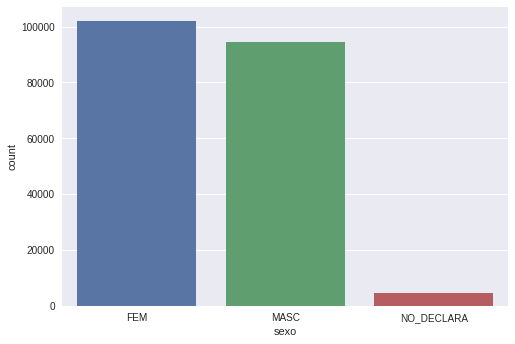

In [0]:
sexo_postulantes = postulantes[['id_postulante','sexo']].drop_duplicates()
# Verificamos de que no exista postulante multiples declaraciones de sexo
sexo_postulantes['id_postulante'].value_counts(sort=True,ascending=False)

# Graficamos la cantidad de postulantes por sexo

sns.countplot(x='sexo',data=sexo_postulantes)
print(sexo_postulantes['sexo'].value_counts())

### Edad vs sexo

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


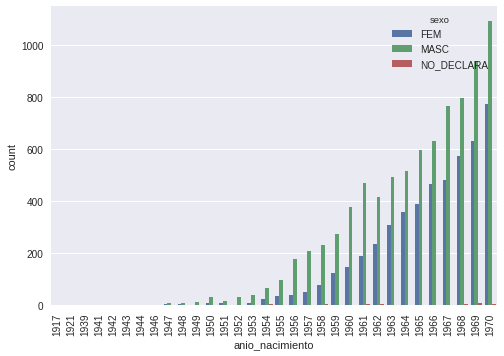

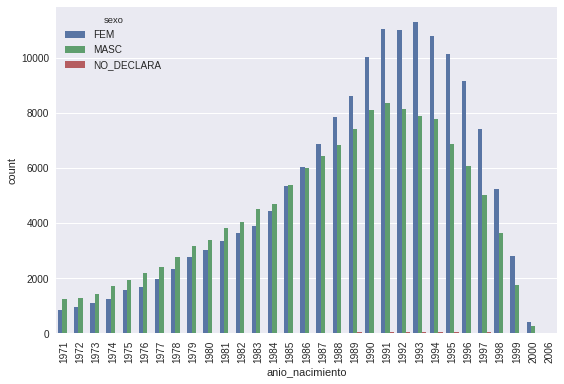

In [0]:
anio_nacimiento_sexo = (postulantes[['fecha_nacimiento','sexo']]
                                  .query('fecha_nacimiento > "1900-01-01" ')
                                  .copy())
anio_nacimiento_sexo['anio_nacimiento'] = ( anio_nacimiento_sexo['fecha_nacimiento']
                                             .dt.year )

#   plt.subplot(1,2,1)
sns.countplot(x='anio_nacimiento',hue='sexo',data=anio_nacimiento_sexo
                                                  .query('anio_nacimiento <= 1970'))
plt.xticks(rotation=90)
#   plt.subplot(1,2,2)
plt.show()
sns.countplot(x='anio_nacimiento',hue='sexo',data=anio_nacimiento_sexo
                                                  .query('anio_nacimiento > 1970'))
plt.xticks(rotation=90)

plt.tight_layout()

**CONCLUSIÓN** El comportamiento Normal de asimetriza Izquierda.

**OBSERVACION** Vemos que la cantidad de "no_declara"es muy baja respecto a Femenino y masculino. Para ver en mejor detalle sobre como se comportan, analizamos aparte la cantidad de "no_declara""



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

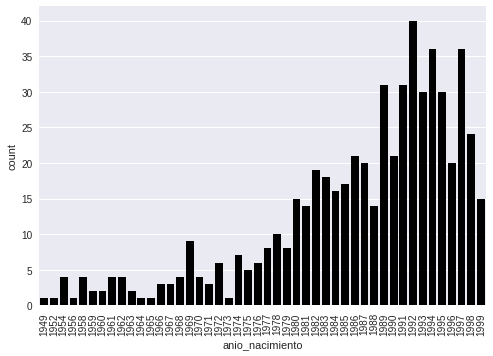

In [0]:
sns.countplot(x='anio_nacimiento',data=anio_nacimiento_sexo.query('sexo == "NO_DECLARA"'),\
             color='Black')
plt.xticks(rotation=90)

**CONCLUSIÓN** El comportamiento Normal de asimetriza Izquierda.


### Edad vs educacion

In [0]:
anio_educacion = postulantes[]

SyntaxError: ignored

### Educacion vs sexo

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


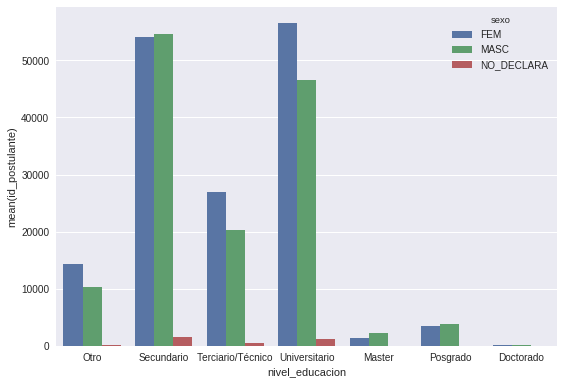

In [0]:
postulantes_ed_sexo = postulantes[['id_postulante','sexo','nivel_educacion']].groupby(['sexo','nivel_educacion'],as_index=False).count()
ax = sns.barplot(x='nivel_educacion',y='id_postulante',hue='sexo',data=postulantes_ed_sexo,
                order=educacion['nivel_educacion'].cat.categories)
# ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.tight_layout()

**CONCLUSION** Las personas que mas aplican son las que menor educacion tienen. Entonces nos preguntamos: **es importante un master, doctorado o posgrado para asegurar el trabajo?** 

Buscaremos responderlo a continuación.

In [0]:
a = postulantes['nivel_educacion'].value_counts()

#df.reset_index(level=['tick', 'obs'])

#a.reset_index(level=a.index.names, inplace=True)
a.reindex(a)
a


Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nivel_educacion, dtype: int64

In [0]:
a.describe

<bound method NDFrame.describe of Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nivel_educacion, dtype: int64>

## Puede un postulante visitar una postulacion despues de haberse postulado?

### CONCLUSION: 
1. Notamos una gran concentración en Secundario y Universitario 

### Buscamos: Que numero de postulantes estan tanto en las visitas como en las postulaciones


In [0]:
postulaciones['id_postulante'].isin(visitas['id_postulante']).value_counts()

False    1772607
True     1629016
Name: id_postulante, dtype: int64

# es necesario visitar el articulo para postularme?

### Agrupamos id_postulante por id_aviso


In [0]:
(postulaciones.groupby(['id_aviso','id_postulante'])
              .count()
              .sort_values(by='fecha_postulacion',ascending=False))

fecha_postulacion
id_aviso   id_postulante                   
1112349911 NzrBbLz                       15
1112306414 Z9NaRY                        14
1112138138 0zP39rY                        8
1112283417 xk9PE20                        8
1112128194 4rWj0X5                        8
...                                     ...
1112270865 96XrZL5                        1
           96zk9Pw                        1
           A3A4AG5                        1
           A3R64oG                        1
1112370500 owEJwR4                        1

[3401262 rows x 1 columns]

### Buscamos saber si hay multiples visitas por id_postulante y fecha_visita

In [0]:
visitas_multiples = ( visitas.groupby(['id_aviso','id_postulante'], as_index = False)
                            .count()
                            .sort_values(by='fecha_visita',ascending=False) )
visitas_multiples = visitas_multiples[visitas_multiples['fecha_visita'] > 1]
# def diff_time(df):
#     return df.max() - df.min()
visitas_fechas = ( visitas.merge(visitas_multiples, 
                               left_on=['id_aviso','id_postulante'],
                               right_on=['id_aviso','id_postulante'],
                               how='inner') )
visitas_fechas = visitas_fechas.drop(columns='fecha_visita_y')
visitas_fechas.groupby(by=['id_aviso','id_postulante']).agg(['min','max'])

fecha_visita_x                        
                                             min                     max
id_aviso   id_postulante                                                
2613010    aNJ3vq        2018-02-26 22:21:03.274 2018-02-26 22:23:49.887
12543760   0zBKjrv       2018-02-26 14:31:26.588 2018-02-26 14:59:52.892
           0zk3Rwr       2018-02-28 15:08:54.415 2018-02-28 15:09:03.853
           1QrGNPQ       2018-02-26 11:04:14.882 2018-02-26 11:09:25.434
           1QrJ6QB       2018-02-26 01:14:35.770 2018-02-26 01:14:37.166
...                                          ...                     ...
1112370471 xk9VWB0       2018-03-01 03:12:08.526 2018-03-01 03:12:10.695
           zv8EwJk       2018-03-01 02:44:33.242 2018-03-01 02:44:34.806
           zv8eBO8       2018-03-01 02:34:12.262 2018-03-01 02:34:14.286
           zvaZlE3       2018-03-01 04:20:43.608 2018-03-01 04:20:45.212
           zvxbwNE       2018-03-01 02:11:12.453 2018-03-01 02:11:13.488

[209173 rows x 2 columns]

In [0]:
# visitas_multiples
# visitas_fechas.sort_values(by=['id_aviso','id_postulante'])
# vistas_fechas.groupby(by=['id_aviso','id_postulante']).count()
visitas_fechas.count()

id_aviso          578771
fecha_visita_x    578771
id_postulante     578771
dtype: int64

In [0]:
# with pd.option_context('display.max_rows', 20):
visitas[(visitas['id_aviso'] == 1112334789) &	(visitas['id_postulante'] == 'VNeZ482')].sort_values(by='fecha_visita')

,id_aviso,fecha_visita,id_postulante
82973,1112334789,2018-02-24 12:53:41.928,VNeZ482
82975,1112334789,2018-02-24 12:53:46.110,VNeZ482
85069,1112334789,2018-02-24 12:53:51.864,VNeZ482
85070,1112334789,2018-02-24 12:53:51.891,VNeZ482
111311,1112334789,2018-02-24 12:53:51.951,VNeZ482
...,...,...,...
83971,1112334789,2018-02-24 12:54:58.279,VNeZ482
82994,1112334789,2018-02-24 12:54:58.307,VNeZ482
83270,1112334789,2018-02-24 12:54:58.336,VNeZ482
87433,1112334789,2018-02-24 12:54:58.761,VNeZ482


Acá vemos que hay varios usuarios que visitan el mismo aviso varias veces, por lo que decidimos ver el período de tiempo en que se vió el anuncio, y en este caso, el postulante vió 116 veces el anuncio en 1 minuto

In [0]:
with pd.option_context('display.max_rows', 20):
  postulaciones[(postulaciones["id_aviso"] == 1112349911)  & (postulaciones["id_postulante"] == "NzrBbLz")]

**EJECUTO** Script

In [0]:
# !pip install pandas_profiling
# import pandas_profiling
# pandas_profiling.ProfileReport(avisos_detalle)



**CONCLUSION** Vemos que hay una faltante importante en columnas como *ciudad*

In [0]:
# visitas.query('idAviso in @id')
# visitas
print('Rango de visitas:\n')
print(visitas['fecha_visita'].agg(['min','max']),'\n')

print('Rango de postulaciones:\n')
print(postulaciones['fecha_postulacion'].agg(['min','max']))

Rango de visitas:

min   2018-02-23 18:38:10.808
max   2018-03-01 04:59:56.812
Name: fecha_visita, dtype: datetime64[ns] 

Rango de postulaciones:

min   2018-01-15 00:00:01
max   2018-02-28 23:59:55
Name: fecha_postulacion, dtype: datetime64[ns]


## 1.3 Estudiamos si hay valores Nulos en dataframes
Nos ayuda a normalizar los datasets y purificar la informacion.

In [0]:
!pip install -q altair
from altair import Chart, X, Y, Axis, SortField

In [0]:
Chart(df)

## REPORTE Global avisoso_Detalle

In [0]:
!pip install pandas_profiling
import pandas_profiling
pandas_profiling.ProfileReport(avisos_detalle)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/dist-packag

Number of variables,11
Number of observations,13534
Total Missing (%),17.6%
Total size in memory,1.1 MiB
Average record size in memory,88.0 B
Numeric,1
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [0]:
print (avisos_detalle.head())

      idaviso  idpais                                         titulo  \
0     8725750       1               VENDEDOR/A PROVINCIA DE SANTA FE   
1    17903700       1                                     Enfermeras   
2  1000150677       1                                 Chofer de taxi   
3  1000610287       1  CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA   
4  1000872556       1  Operarios de Planta - Rubro Electrodomésticos   

                                         descripcion        nombre_zona  \
0  <p><strong><strong>Empresa:</strong></strong> ...  Gran Buenos Aires   
1  <p>Solicitamos para importante cadena de farma...  Gran Buenos Aires   
2  <p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...    Capital Federal   
3  <p><strong>Somos una empresa multinacional que...  Gran Buenos Aires   
4  <p><strong>OPERARIOS DE PLANTA</strong></p><p>...  Gran Buenos Aires   

  ciudad       mapacalle tipo_de_trabajo         nivel_laboral nombre_area  \
0    NaN             NaN       Full-ti

In [0]:
print (avisos_detalle['nombre_zona'].value_counts())

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64


In [0]:
print (avisos_detalle['ciudad'].value_counts())

In [0]:
print (avisos_detalle['titulo'].head(30))


0                     VENDEDOR/A PROVINCIA DE SANTA FE
1                                           Enfermeras
2                                       Chofer de taxi
3        CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA
4        Operarios de Planta - Rubro Electrodomésticos
                            ...                       
25          TECNICO SSr.  -Soporte a usuarios nivel 2-
26    ENVASADOR / PREPARADOR / CONTROLADOR / EMBALADOR
27                       Jefe de Calidad con movilidad
28                                 Chofer para Reparto
29          SUPERVISOR COMODORO RIVADAVIA/BAHIA BLANCA
Name: titulo, Length: 30, dtype: object


In [0]:
print (avisos_detalle['tipo_de_trabajo'].value_counts())

# ANALISIS           PONER *TITULO*

# CORRELACION ENTRE VARIABLES

In [0]:
postulantes_genero_edad.corr()



""


# 3. VISUALIZACIONES

## GRAFICO 3.1 : Grafico de porcentaje de nivel de educación de los postulantes


## GRAFICO 3.2: Grafico de cantidad de postulantes por género


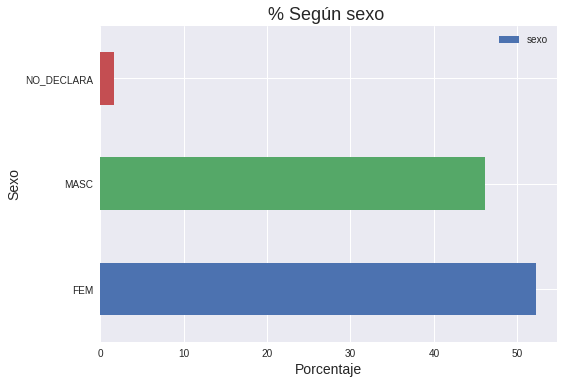

In [0]:
# Grafico de cantidad de postulantes por género
postulantes_sexo = (postulantes['sexo'].value_counts()/postulantes['sexo'].count())*100
postulantes_sexo.plot(kind = 'barh');

plt.xlabel("Porcentaje", fontsize=14)
plt.ylabel("Sexo", fontsize=14)
plt.title("% Según sexo ", fontsize=18)
plt.legend()

plt.tight_layout()

## GRAFICO 3.3: Histograma de edad de los postulantes

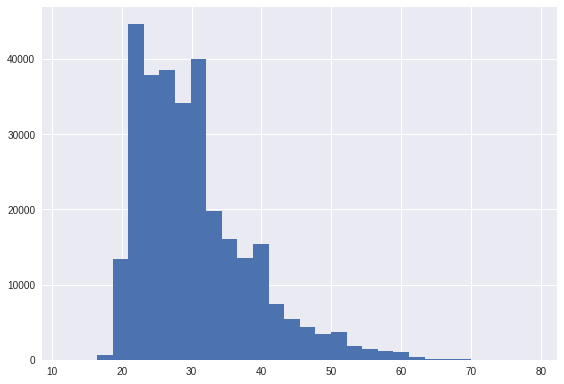

In [0]:
# Histograma de edad de los postulantes

postulantes['ano_nacimiento'] = postulantes['fecha_nacimiento'].dt.year
postulantes['edad'] = (2018 - postulantes['ano_nacimiento'])

postulantes_edad = postulantes
postulantes_edad = postulantes_edad[postulantes_edad.edad < 80]
postulantes_edad['edad'].hist(bins = 30);
plt.tight_layout()


In [0]:
postulantes

,id_postulante,nivel_educacion,estado,fecha_nacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM
...,...,...,...,...,...
310362,mzdNo99,NaN,NaN,1999-08-10,FEM
310363,Nzr1J34,NaN,NaN,NaN,NO_DECLARA
310364,JBrNMNk,NaN,NaN,1997-01-11,MASC
310365,2zP6Jd0,NaN,NaN,1997-03-06,FEM


## 3.4 GRAFICO : Grafico de Barras agrupando por nivel de Educacion y Sexo vs Cantidad postulantes.



# es importante un master, doctorado o posgrado para asegurar el trabajo?
Estudio la correlacion entre variables. Para aplicar corr() debo asegurar que las variables sean del tipo numerico

In [0]:
#typo de data

postulantes.dtypes

NameError: ignored

Como ninguno es del tipo numerico debemos buscar la forma de pasar a un analisis numerico. Para ello buscamos conocer la cantidad de NIVEL_EDUCACION por NOMBRA_AREA_LABORAL:

In [0]:
print(postulantes.corr())


                ano_nacimiento  edad
ano_nacimiento             1.0  -1.0
edad                      -1.0   1.0


In [0]:
print (visitas.head())

     id_aviso            fecha_visita id_postulante
0  1111780242 2018-02-23 18:38:13.187       YjVJQ6Z
1  1112263876 2018-02-23 18:38:14.296       BmVpYoR
2  1112327963 2018-02-23 18:38:14.329       wVkBzZd
3  1112318643 2018-02-23 18:38:17.921       OqmP9pv
4  1111903673 2018-02-23 18:38:18.973       DrpbXDP


# TIME SPLIT

## TIME Split : en TABLA_VISITA
Nos dimos cuenta que el formato de de la columna "fecha_visita"no nos es comodo para trabajar. Para acomodarlo, buscamos separar la hora ("Time") y el dia ("Date")

In [0]:
#Separamos Date y Time
temp = pd.DatetimeIndex(visitas['fecha_visita'])
visitas['fecha_visita'] = temp.date
visitas['horario_visita'] = temp.time

visitas.head()





,id_aviso,fecha_visita,id_postulante,Date,Time,horario_visita
0,1111780242,2018-02-23,YjVJQ6Z,2018-02-23,18:38:13.187000,18:38:13.187000
1,1112263876,2018-02-23,BmVpYoR,2018-02-23,18:38:14.296000,18:38:14.296000
2,1112327963,2018-02-23,wVkBzZd,2018-02-23,18:38:14.329000,18:38:14.329000
3,1112318643,2018-02-23,OqmP9pv,2018-02-23,18:38:17.921000,18:38:17.921000
4,1111903673,2018-02-23,DrpbXDP,2018-02-23,18:38:18.973000,18:38:18.973000


In [0]:
# Acomodamos el formato
temp = pd.DatetimeIndex(postulaciones['fecha_postulacion'])
postulaciones['fecha_postulacion'] = temp.date
postulaciones['horario_postulacion'] = temp.time

postulaciones.head()

NameError: ignored

### *Cuales* son los avisos mas vistos?
Buscamos estudiar cules son los Avisos mas vistos (Sin contar las repeticiones que ocurrieron en un mismo día) Esto es importante dado que nos interesa conocer la PRESENCIA DIARIA DEL USUARIO.

In [0]:
#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
#visitas[['idpostulante','idAviso']].groupby(['idAviso']).agg(['count'])
#grouped = visitas.groupby('idAviso').count().reset_index()
#grouped.sort_values('timestamp', ascending=False)

aux2 = visitas[['id_aviso','id_postulante','Date']].drop_duplicates()
aux = aux2['id_aviso']
aux.value_counts().head()



1112359836    2882
1112363488    2803
1112366909    2327
1112369306    2110
1112355872    2097
Name: id_aviso, dtype: int64

## Cuales son los avisos mas vistos?


In [0]:
aux = aux2['id_postulante']
aux.value_counts().head()

dYJV5K2    585
8MaQjP3    377
8Mrr8dM    271
OqjNZ2x    244
96XNwzw    220
Name: id_postulante, dtype: int64

## que aviso se postula mas la gente? avisos y postulaciones

In [0]:

aux2 = postulaciones[['id_aviso','id_postulante','Date']].drop_duplicates()
aux = aux2['id_aviso']
aux.value_counts().head()

1112033906    9932
1112334791    9787
1112204682    9244
1112094756    8763
1112345900    8304
Name: id_aviso, dtype: int64

## Que postulantes se postulan mas veces? cantidad por idpostulante

In [0]:
aux = aux2['id_postulante']
aux.value_counts().head()

NameError: ignored

## Estudiamos los periodos de visita
Para ello, analizamos maximo y minimo de fechas segun id_aviso

In [0]:
def dadoIDavisoDevolverPeriodoVisto(idAviso):
  return visitas[visitas['id_aviso'] == idAviso]['Date'].agg(['min','max'])

In [0]:
dadoIDavisoDevolverPeriodoVisto(1112033906)

min    2018-02-23
max    2018-02-28
Name: Date, dtype: object

In [0]:

3.
diferencia en sexo por nombre_area
diferencia en edad por nombre_area
4.
diferencia en sexo por tipo_de_trabajo
diferencia en edad por tipo_de_trabajo
5.
diferencia en sexo por nivel_laboral
diferencia en edad por nivel_laboral

SyntaxError: ignored

diferencia en sexo por nombre_area


# titulo??????????


## CREAMOS LA TABLA Postulaciones_genero_edad_postulaciones_con_detalle : merge dePOSTULANTES_GENERO, POSTULACIONES y AVISOS_DETALLES


In [0]:
#Armamos el merge

postulantes_genero_edad_postulaciones  =  pd.merge( postulantes_genero_edad, postulaciones,  how = 'inner' ,  on = [ 'id_postulante'])
postulantes_genero_edad_postulaciones_con_detalle  =  pd.merge( postulantes_genero_edad_postulaciones, avisos_detalle, how = 'inner' ,  on = [ 'id_aviso'])

#TIME Split

#Separamos Date y Time
temp2 = pd.DatetimeIndex(postulantes_genero_edad_postulaciones_con_detalle['fecha_postulacion'])
postulantes_genero_edad_postulaciones_con_detalle['Date'] = temp2.date
postulantes_genero_edad_postulaciones_con_detalle['Time'] = temp2.time

#Generamos una columna con los DIAS DE Date
postulantes_genero_edad_postulaciones_con_detalle['Date'] = pd.to_datetime(postulantes_genero_edad_postulaciones_con_detalle['Date'])
postulantes_genero_edad_postulaciones_con_detalle['day_of_week'] = postulantes_genero_edad_postulaciones_con_detalle['Date'].dt.weekday_name


#Imprimo
postulantes_genero_edad_postulaciones_con_detalle.head(1)



,id_postulante,fecha_nacimiento,sexo,id_aviso,fecha_postulacion,horario_postulacion,titulo_aviso,descripcion_aviso,zona_de_trabajo,ciudad,direccion,tipo_de_trabajo,nivel_laboral,nombre_area_laboral,nombre_empresa,esta_activo,Date,Time,day_of_week
0,NM5M,1970-12-03,FEM,1112257047,2018-01-15,16:22:34,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,False,2018-01-15,00:00:00,Monday


In [0]:
ax = sns.swarmplot(x="day_of_week", y=postulantes_genero_edad_postulaciones_con_detalle['nombre_area_laboral'].value_counts(), data=postulantes_genero_edad_postulaciones_con_detalle)
#ax = sns.boxplot(x="day_of_week",
                 data=postulantes_genero_edad_postulaciones_con_detalle,
        showcaps=False,boxprops={'facecolor':'None'},
        showfliers=False,whiskerprops={'linewidth':0})

plt.show()


IndentationError: ignored

Fijate de definir un nuevo dataframe que tenga solo las columnas que te interesan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


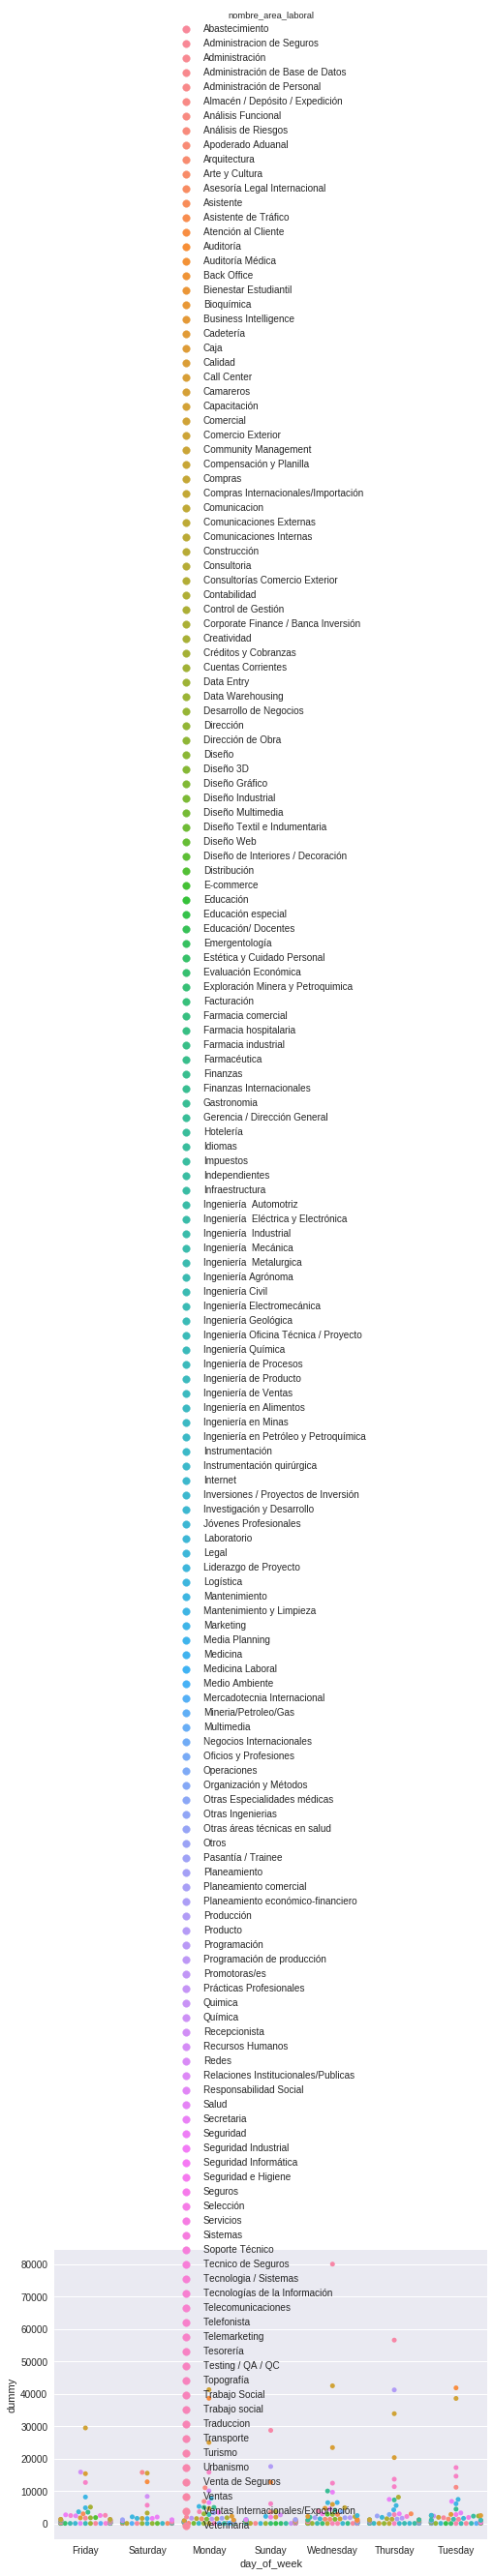

In [0]:
df = postulantes_genero_edad_postulaciones_con_detalle[['nombre_area_laboral',
                                                             'day_of_week']]
df['dummy'] = 1 #agrego columna para poder agrupar
df = df.groupby(by=['day_of_week','nombre_area_laboral'],as_index=False).count()

df2 = df.sample(n=500)
ploti = sns.swarmplot(x='day_of_week',y='dummy',hue='nombre_area_laboral', data=df2)


In [0]:
#Reviso el dtype de la columna "day_of_week"
print(postulantes_genero_edad_postulaciones_con_detalle.dtypes)

id_postulante                object
fecha_nacimiento     datetime64[ns]
sexo                       category
id_aviso                      int64
fecha_postulacion            object
                          ...      
nombre_empresa               object
esta_activo                    bool
Date                 datetime64[ns]
Time                         object
day_of_week                  object
Length: 19, dtype: object


Veo que "day_of_week"es **object** busco ahora, que sea **categorical** para trabajar con Swarmplot ;) en el proximo punto.

In [0]:
#Convierto "day_of_week"de *objeto* a *category*
postulantes_genero_edad_postulaciones_con_detalle["day_of_week"] = postulantes_genero_edad_postulaciones_con_detalle["day_of_week"].astype('category')

#verifico conversion
print(postulantes_genero_edad_postulaciones_con_detalle.dtypes)


id_postulante                object
fecha_nacimiento     datetime64[ns]
sexo                       category
id_aviso                      int64
fecha_postulacion            object
                          ...      
nombre_empresa               object
esta_activo                    bool
Date                 datetime64[ns]
Time                         object
day_of_week                category
Length: 19, dtype: object


## Contar la cantidad de postulaciones a nombre_area_Laboral por day_of _week
Buscamos saber la cantidad para luego representarlo y asi entender el comportamiento de las nombre_areas_laboral durante los dias de la semana.

In [0]:
#postulantes_genero_edad_postulaciones_con_detalle['nombre_area_laboral'].value_counts
postulantes_agrupados_1 = postulantes_genero_edad_postulaciones_con_detalle.groupby(['nombre_area_laboral'],as_index=True).count()["id_postulante"].sort_values(ascending=False)
postulantes_agrupados_1.head(20)


nombre_area_laboral
Ventas                        408148
Administración                291135
Producción                    277089
Comercial                     216677
Atención al Cliente           195636
                               ...  
Logística                      37139
Administración de Personal     37011
Créditos y Cobranzas           36690
Marketing                      29861
Legal                          29295
Name: id_postulante, Length: 20, dtype: int64

In [0]:
ax = sns.swarmplot(x="day_of_week", y="total_bill",hue=nombre_area_laboral, data=postulantes_genero_edad_postulaciones_con_detalle)
#ax = sns.boxplot(x="day", y="total_bill", data=tips,
        #showcaps=False,boxprops={'facecolor':'None'},
        #showfliers=False,whiskerprops={'linewidth':0})

plt.show()

ValueError: ignored

## GRAFICO: Cantidad por nombre_area_laboral por Dia semana

Estas aca??

In [0]:
sns.swarmplot(x="day_of_week", hue="nombre_area_laboral", data=postulantes_genero_edad_postulaciones_con_detalle);

NameError: ignored

# JUEGO GRAFICO raros


## GRAFICO 1: Correlacion entre variables psotualciones

1) corr() toda variables numericas deben ser
https://github.com/afolaborn/Python_Jupyter_Notebook/blob/master/Correlation/Correlation_Matrix_Upload.ipynb

In [0]:
swarmplot_cantidad_area = sns.swarmplot( data=postulantes_genero_edad_postulaciones_con_detalle)

,id_aviso,id_postulante,fecha_postulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03
...,...,...,...
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06


## TIME SPLIT : en TABLA 

In [0]:
print (postulantes_genero_edad_postulaciones_con_detalle.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074206 entries, 0 to 3074205
Data columns (total 17 columns):
id_postulante          object
fecha_nacimiento       object
sexo                   object
id_aviso               int64
fecha_postulacion      object
titulo_aviso           object
descripcion_aviso      object
zona_de_trabajo        object
ciudad                 object
direccion              object
tipo_de_trabajo        object
nivel_laboral          object
nombre_area_laboral    object
nombre_empresa         object
is_online              bool
Date                   object
Time                   object
dtypes: bool(1), int64(1), object(15)
memory usage: 401.7+ MB
None


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172] nombre_area_laboral


(169.5, 170.5)

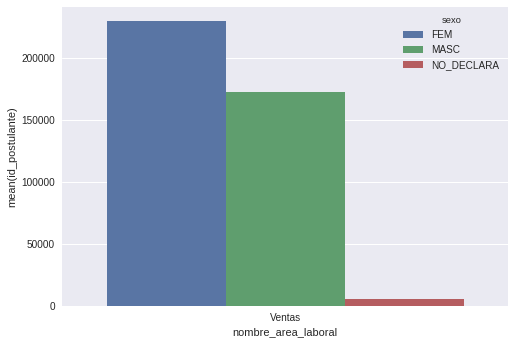

In [0]:
sexo_nombre_area = postulantes_genero_edad_postulaciones_con_detalle[['id_postulante','sexo','nombre_area_laboral']]

#print (type(sexo_nombre_area.groupby(['sexo', 'nombre_area'])))
e = sexo_nombre_area.groupby(['nombre_area_laboral','sexo'],as_index=False).count()
print(e.sort_values(by='id_postulante',ascending=False))


data_para_plotear = e[e.nombre_area_laboral.isin(['Ventas'])]

print (data_para_plotear)


ax2 = sns.barplot(x='nombre_area_laboral',y='id_postulante',hue='sexo',\
                  data=data_para_plotear)

ticks = ax2.get_xticks()
labels = ax2.get_xlabel()
print(ticks,labels)
ax2.set_xlim((169.5,170.5))

# ax2.set_xticks([172])

#grouped = sexo_nombre_area.groupby(['sexo', 'nombre_area']).count().reset_index()

#print (grouped.head())
#visitas[['idpostulante','idAviso']].groupby(['idAviso']).agg(['count'])
#grouped = visitas.groupby('idAviso').count().reset_index()
#grouped.sort_values('timestamp', ascending=False)


#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])

#sexo_nombre_area [[ "idpostulante" ,  "idAviso" ]] . agg ([ 'suma' ,  'media' ])


In [0]:
avisos_detalle.head(10)

NameError: ignored